In [96]:
# Import all the necessary libraries.
import numpy as np
import matplotlib.pyplot as plt

# Import the linear regression module form the library.
from sklearn.linear_model import LinearRegression

In [97]:
# Always reset the pseudo-random numbers generator to a known value so that your results are always the same.
np.random.seed(1234)

In [98]:
# Generate input/ouput (features/labels) values.
N = 100 # Number of observations (pairs of features and labels).

# True function.
x = 2.0*np.random.rand(N, 1)
y = 4.0 + 3.0*x 

# Observable function.
y_noisy = y + np.random.randn(N, 1)

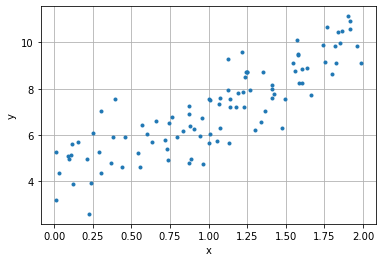

In [99]:
# Plot pair example/label.
fig = plt.figure()
plt.plot(x, y_noisy, '.')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

## Manual solution

In [100]:
# Solve by applying the least-Squares method.
# We use the inv() function from NumPy’s Linear Algebra module (np.linalg) to compute the inverse of a matrix.
# We use dot() method for matrix multiplication.
X_b = np.c_[np.ones((N, 1)), x] # add x0 = 1 to each instance
a_optimum = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y_noisy)

# Print best solution.
print('a0: %1.4f' % (a_optimum[0][0]))
print('a1: %1.4f' % (a_optimum[1][0]))

a0: 4.0763
a1: 2.9413


In [101]:
yhat = X_b.dot(a_optimum)

Je_optimum = (1/N)*np.sum(np.power((y_noisy - yhat), 2))
print('MSE:', Je_optimum)

MSE: 0.9272583695173344


## Scikit-learn's solution

In [102]:
# Instantiate the LinearRegression class.
lin_reg = LinearRegression()

# Train the model.
lin_reg.fit(x, y_noisy)

print('a0: %1.4f' % (lin_reg.intercept_[0])) # Value that crosses the y-axis when all features are equal to 0.
print('a1: %1.4f' % (lin_reg.coef_[0][0])) # parameters associated with the features.

# Create column vector.
a_sklearn = np.zeros((2, 1))
a_sklearn[0][0] = lin_reg.intercept_[0]
a_sklearn[1][0] = lin_reg.coef_[0][0]

a0: 4.0763
a1: 2.9413


In [103]:
yhat = X_b.dot(a_sklearn)

Je_sklearn = (1/N)*np.sum(np.power((y_noisy - yhat), 2))
print('MSE:', Je_sklearn)

MSE: 0.9272583695173342


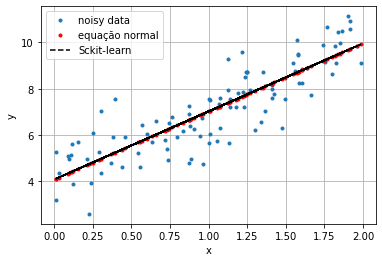

In [104]:
# Plot pair example/label.
fig = plt.figure()
plt.plot(x, y_noisy, '.', label='noisy data')
plt.plot(x, X_b.dot(a_optimum), 'r.', label='equação normal')
plt.plot(x, X_b.dot(a_sklearn), 'k--', label='Sckit-learn')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()